# Project: Students' Academic Performance Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is project is about a [Students' Academic Performance Dataset](https://www.kaggle.com/aljarah/xAPI-Edu-Data/downloads/students-academic-performance-dataset.zip/6) which is collected from learning management system (LMS) called Kalboard 360. Kalboard 360 is a multi-agent LMS, which has been designed to facilitate learning through the use of leading-edge technology. 

> Attributes
- Gender - student's gender (nominal: 'Male' or 'Female’)
- Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)
- Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)
- Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)
- Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)
- Section ID- classroom student belongs (nominal:’A’,’B’,’C’)
- Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)
- Semester- school year semester (nominal:’ First’,’ Second’)
- Parent responsible for student (nominal:’mom’,’father’)
- Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)
- Visited resources- how many times the student visits a course content(numeric:0-100)
- Viewing announcements-how many times the student checks the new announcements(numeric:0-100)
- Discussion groups- how many times the student participate on discussion groups (numeric:0-100)
- Parent Answering Survey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)
- Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)
- Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

> Questions we may ask about the data set
- Which nationality provides the highest number of students in LMS and which one provides the lowest?
- Relationship between country and students with highest grade level?
- What is the grade level of a student who raises their hand the highest or more often?

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
> Tip: In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.
### General Properties

In [98]:
# load the data set
df = pd.read_csv('students.csv')
df.head(1)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M


In [99]:
# find number of columns and rows
df.shape

(480, 17)

In [100]:
# summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


In [101]:
# statistics
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [102]:
# data types
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [103]:
# data type for gender
type(df['gender'][0])

str

In [104]:
type(df['NationalITy'][0])

str

In [105]:
type(df['PlaceofBirth'][0])

str

In [106]:
type(df['StageID'][0])

str

In [107]:
type(df['GradeID'][0])

str

In [108]:
type(df['SectionID'][0])

str

In [109]:
type(df['Topic'][0])

str

In [110]:
type(df['Semester'][0])

str

In [111]:
type(df['Relation'][0])

str

In [112]:
type(df['ParentAnsweringSurvey'][0])

str

In [113]:
type(df['ParentschoolSatisfaction'][0])

str

In [114]:
type(df['StudentAbsenceDays'][0])

str

In [115]:
type(df['Class'][0])

str

In [116]:
# unique values
df.nunique()

gender                       2
NationalITy                 14
PlaceofBirth                14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
raisedhands                 82
VisITedResources            89
AnnouncementsView           88
Discussion                  90
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64

In [117]:
# duplicated rows
sum(df.duplicated())

2

In [118]:
# find missing values
df.isnull().any(axis=1).sum()

0

### Data Cleaning

In [119]:
# getting rid of duplicates
df.drop_duplicates(inplace=True)

In [120]:
# check for duplicates
sum(df.duplicated())

0

In [121]:
# rename columns
new_columns = ['gender', 'nationality', 'placeOfBirth', 'stageId', 'gradeId', 'sectionId', 'topic', 'semester', 'relation',
              'raisedHands', 'visitedResources', 'announcementsView', 'discussion', 'parentAnsweringSurvey', 'parentSchoolSatisfaction', 'studentAbsenceDays', 'class'
              ]
df.columns = new_columns
df.head()

,gender,nationality,placeOfBirth,stageId,gradeId,sectionId,topic,semester,relation,raisedHands,visitedResources,announcementsView,discussion,parentAnsweringSurvey,parentSchoolSatisfaction,studentAbsenceDays,class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


<a id='eda'></a>
## Exploratory Data Analysis
> Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

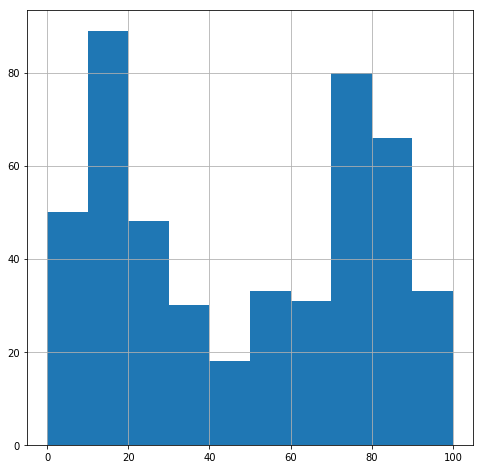

In [125]:
# working with matplotliib
df['raisedHands'].hist(figsize=(8,8))

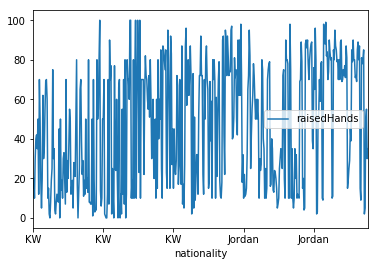

In [126]:
df.plot(x="nationality", y="raisedHands")

<a id='conclusions'></a>
## Conclusions